<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 


Предсказываем на сколько небезопасна транзакция кредитных карт

Чем сложнее модель, тем лучше она предсказывает на тренировочных данных и хуже на тестовых

Применить свои знания
Посмотреть готовые и на основе готовых сделать свой анализ

**1. Загрузить датасет**

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [64]:
data=pd.read_csv('creditcard.csv') 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года держателями карт из Европы.
Этот набор данных представляет транзакции, которые произошли за два дня, где у нас есть 492 мошенничества из 284 807 транзакций.



Датасет содержит 31 колонку: 

Time - секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных

V1 ... V28 - численные признаки, зашифрованные из-за конфидециальности

Amount - сумма транзакции

Class - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
data.isnull().sum()

#отсутствующих значений нет

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Посмотрим основные статистические показатели по всем колонкам

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [5]:
# Посчитаем процентное соотношение классов
print('Безопасные операции', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% данных')
print('Мошенничество', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% данных')

Безопасные операции 99.83 % данных
Мошенничество 0.17 % данных


Классы сильно несбалансированы

/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


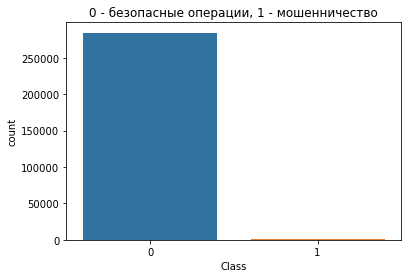

In [6]:
sns.countplot('Class', data=data)
plt.title('0 - безопасные операции, 1 - мошенничество')
plt.show()


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


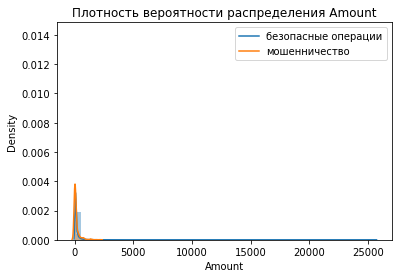

In [7]:
class_0 = data[data.Class == 0]['Amount']
class_1 = data[data.Class == 1]['Amount']
sns.distplot(class_0)
sns.distplot(class_1)
plt.title('Плотность вероятности распределения Amount')
plt.legend(['безопасные операции', 'мошенничество'])
plt.show()

Нужно масштабировать столбец Amount чтобы иметь одинаковое количество случаев мошеннических и безопасных операций.


/Users/iriska/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


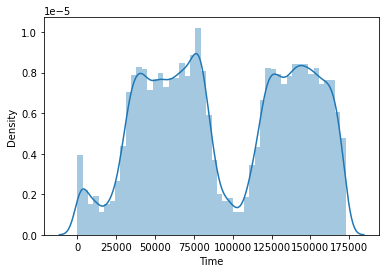

In [8]:
sns.distplot(data.Time)
plt.show()

In [ ]:
Атрибут Time так же не масштабирован

**5. Построить графики histograms для всех значений**

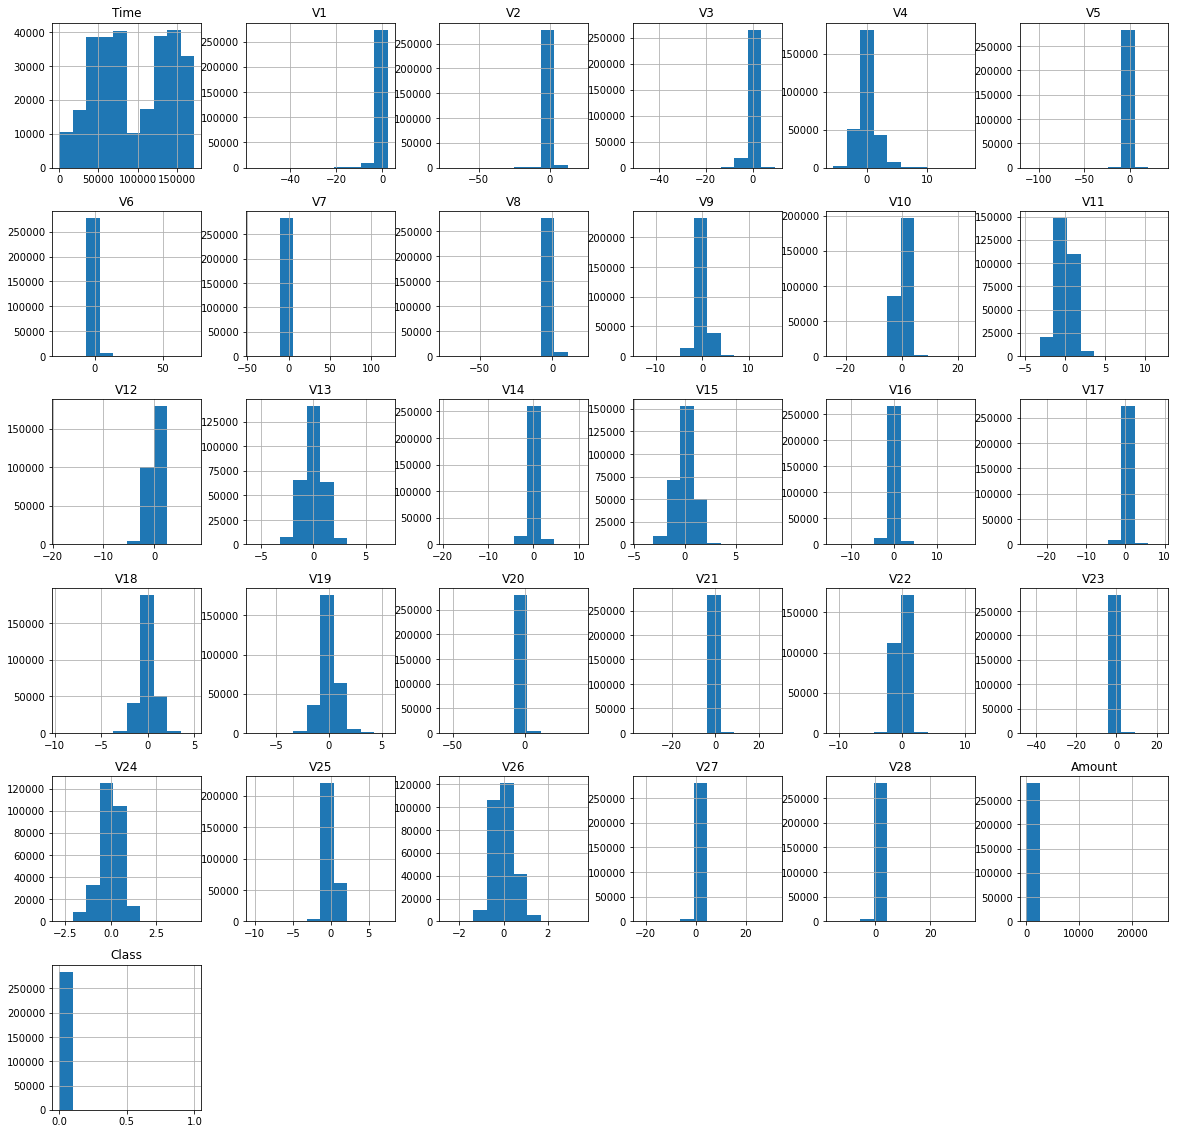

In [9]:
data.hist(figsize=(20,20))
plt.show()

На графике видно, что V4, V13, V15, V18, V19, V24, V26 имеют нормальное или близко к нормальному распределения.

Признаки принимают разные значения, это значит что данные не нормализованы

**6. Построить матрицу корреляций для всех значений**

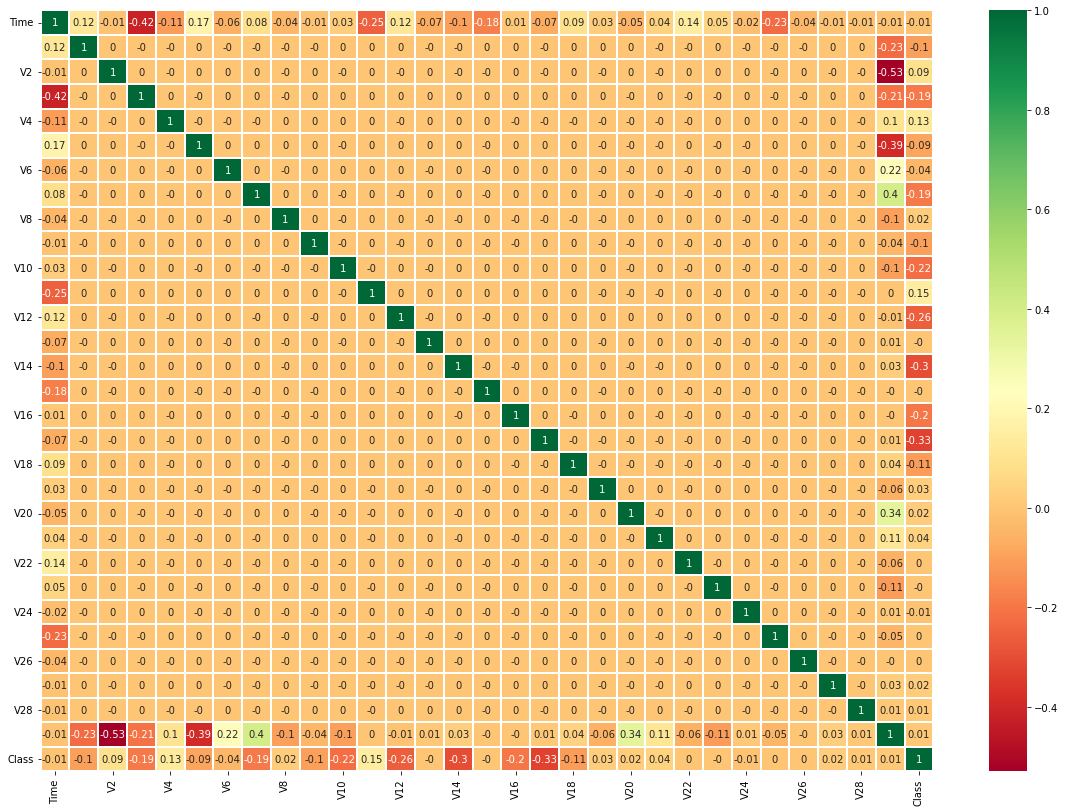

In [10]:
correlation_matrix = data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

Корреляцию имеют только атрибуты: Time, Amount, Class. Все основные атрибуты (V1 ... V28) имеют нулевую корреляцию. Возможно, это связано с тем, что классы имеют сильный дисбаланс. 

#### Напишем логическую регрессию для исходных данных

In [3]:
# Разделяю исходные неподготовленные данные на тренировочные и тестовые

from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
Y = data.Class

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)




In [4]:
# Вычисляем логичекую регрессию сырых данных

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = X_train_raw
y = y_train_raw

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

model.score(x, y)



0.9988281507164959

In [8]:
lr_pred = model.predict(X_test_raw)


In [6]:
model.score(X_test_raw, y_test_raw)

0.9988062216916541

In [9]:
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    56871
1       91
Name: 0, dtype: int64

### Метрики классификации

**Матрица ошибок**

![jupyter](matrix_error.png)

Истинно позитивное предсказание (True Positive, сокр. TP)

Истинно отрицательное предсказание (True Negative, TN)

Ошибочно положительное предсказание (ошибка типа I, False Positive, FN)

Ошибочно отрицательное предсказание (ошибка типа II, False Negative, FN)

**Оценим точность предсказаний**

**Precision** (точность) - количество истинных положительных результатов, деленное на все положительные прогнозы. Точность также называется положительной прогностической ценностью. Низкая точность указывает на большое количество ложных срабатываний. Точность показывает какая доля объектов, выделенная классификатором как положительная, действительно является положительной

**Recall** (полнота) - количество истинных положительных результатов, деленное на количество положительных значений в тестовых данных. Отзыв также называется чувствительностью или истинной положительной скоростью. Низкий отзыв указывает на большое количество ложноотрицательных результатов. Полнота показывает какая доля положительных объектов была выделена классификатором как положительная

**F1: Score** - средневзвешенное значение точности и полноты, объединяет в себе информацию о точности и полноте нашего алгоритма. Принимает значения от 0 до 1. Точность, полнота и F-score подходят для оценки качества на несбалансированных выборках

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

In [12]:
# f1 score

from sklearn.metrics import f1_score

f1_score(y_test_raw, lr_pred)




0.6494845360824741

In [13]:
# recall score

from sklearn.metrics import recall_score

recall_score(y_test_raw, lr_pred)

0.6116504854368932

In [15]:
# эти же метрики можно вычислить с помощью classification_report

print(classification_report(y_test_raw, model.predict(X_test_raw)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.69      0.61      0.65       103

    accuracy                           1.00     56962
   macro avg       0.85      0.81      0.82     56962
weighted avg       1.00      1.00      1.00     56962



Как видно из метрик Precision, Recall, F1-score, пока построенная модель не сильно точна, попробуем улучшить результаты

### Масштабируем атрибуты Time и Amount

Для этого воспользуемся методом StandardScaler и RobustScaler для борьбы с выбросами

In [65]:
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

#data.drop(['Time','Amount'], axis=1, inplace=True)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


#### Возьмем для предсказания масштабированные данные. Разделяем данные на тренировочные и тестовые.

In [67]:
# подготавливаю тестовые и тренировочные данные
# разделяю данные на Х - все атрибуты и У - класс, то что нужно предсказать

X = data.drop('Class', axis=1)
Y = data.Class

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [69]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1480,-0.981403,-1.176271,0.091708,1.551962,1.628364,0.407879,1.468424,0.356669,0.399858,-1.545261,...,-0.027671,-0.002151,0.162299,-0.016487,-0.470008,-0.652387,3.463246,-0.090690,-0.050293,1.767484
61519,-0.409016,0.202427,-2.673145,0.986417,0.069124,-2.148376,0.835610,-0.816475,0.248261,0.041712,...,1.134047,0.510496,0.603232,-0.487968,0.328277,0.147512,-0.177335,-0.007052,0.108523,7.152379
18923,-0.644098,1.582499,-0.977556,-0.155662,-1.709962,-0.623632,0.259923,-0.982421,-0.054021,-1.842414,...,-0.284342,-0.274271,-0.316942,-0.112250,-1.322726,0.522923,-0.091844,0.049101,0.004114,-0.167680
251833,0.832070,1.679645,-0.732749,-1.344941,0.513414,-0.567793,-1.565750,0.417994,-0.445207,0.462723,...,0.133392,0.347559,0.651322,-0.063051,0.527664,-0.093420,0.740313,-0.130484,-0.033624,2.473276
32327,-0.563247,-0.479034,0.829256,1.437498,0.605334,-0.137317,0.008391,0.812324,0.051583,-0.089164,...,-0.195416,-0.107443,-0.268608,-0.043978,0.035679,-0.010292,-0.532901,-0.042235,0.006976,0.616363


#### Написать логистическую регрессию для масштабированных данных, классы несбалансированны. Сделать classification report.

In [70]:
x = X_train
y = y_train

In [71]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [72]:
model.score(x, y)

0.999223156092958

In [73]:
model.predict(X_test_raw)

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
model.score(X_test_raw, y_test_raw)

0.998139110284049

In [75]:
print(classification_report(y_test_raw, model.predict(X_test_raw)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



### Устранение дисбаланса классов

Как было определено ранее, датасет имеет 492 мошеннические операции. Нужно привести число безопасных транзакций к этому же числу (добиваемся соотношения 50/50), далее перемешаем данные.

Основная проблема - риск, что наши модели классификации не будут работать так точно, как нам хотелось бы, поскольку происходит большая потеря информации (для построения модели используется 492 транзакции, не связанные с мошенничеством, из 284 315 транзакций). 

In [76]:
data = data.sample(frac=1)

# мошеннических операций 492 строки
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle перемешиваем данные
normal_sample_data = normal_distributed_data.sample(frac=1, random_state=42)

normal_sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
23882,-0.607690,1.114435,0.134112,0.115565,0.922764,-0.179342,-0.016938,-0.276594,0.201828,0.368508,...,-0.104485,-0.073385,-0.075201,-0.050648,0.435174,0.424824,0.012258,0.028799,-0.135401,0
118308,-0.113476,-0.430330,0.985633,0.645789,0.317131,0.616332,-1.347462,1.078234,-0.161518,-0.492856,...,-0.016378,-0.207609,-0.164119,0.255280,0.454798,-0.505032,-0.039456,-0.006358,0.113743,1
45330,-0.498056,-0.859606,1.303477,1.705137,0.330391,0.249744,-0.519480,0.836900,-0.326980,-0.385427,...,-0.196997,-0.358238,-0.009946,0.381980,-0.341959,0.131792,-0.234047,-0.027780,-0.279746,0
75511,-0.335930,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,2.080905,1
163586,0.368602,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,0.600852,1


#### Построим вновь корреляционную матрицу

Данные масштабированы, классы сбалансированны. Построим вновь матрицу корреляции.


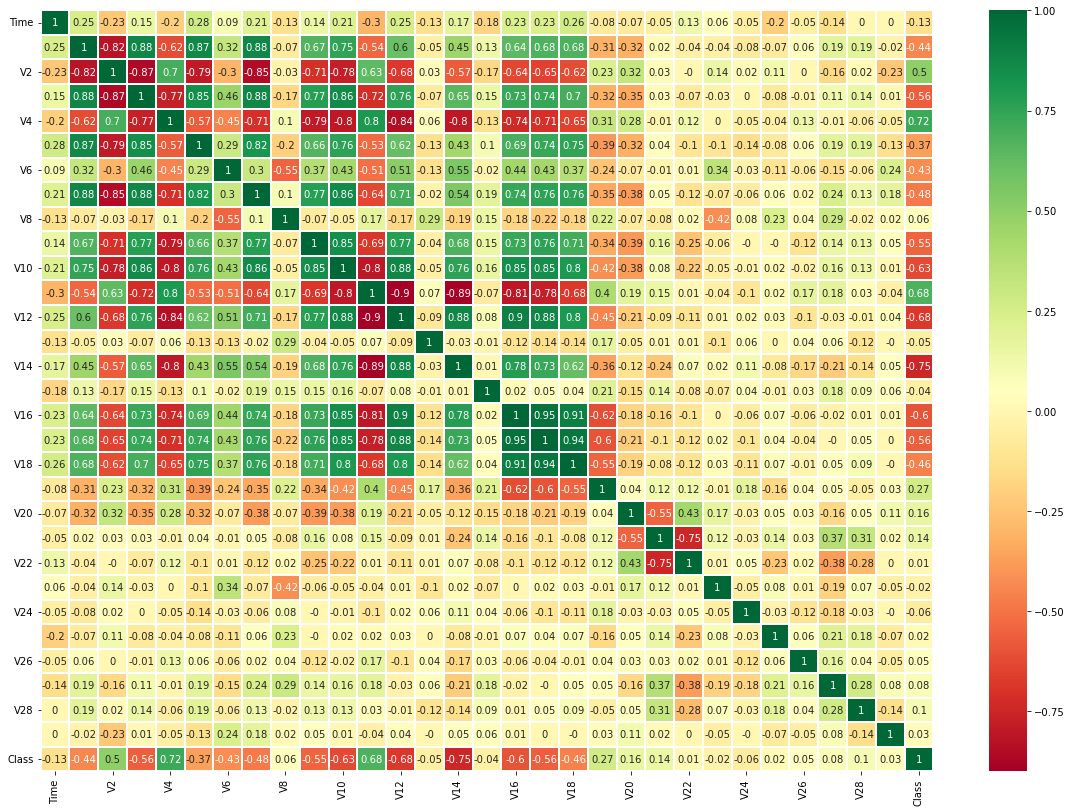

In [77]:
correlation_matrix = normal_sample_data.corr(method ='pearson').round(2)
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

#### Построим логическую регрессию (данные масштабированы, классы сбалансированы)

In [78]:

x = normal_sample_data.drop('Class', axis=1)
y = normal_sample_data.Class

In [79]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [80]:
model.classes_

model.intercept_

model.coef_

array([[-0.78971425,  0.26367278, -0.32735428,  0.05738841,  0.96106937,
         0.34084243, -0.50416408,  0.03743431, -0.68954011, -0.4472916 ,
        -0.85254679,  0.45653996, -1.03399611, -0.27418036, -1.32093557,
        -0.2620126 , -0.64435077, -0.92226319, -0.07490192,  0.22555864,
        -0.06945059,  0.26885183,  0.58658464, -0.09466171,  0.00752798,
        -0.13921181, -0.34222905,  0.16433514,  0.99963304,  0.08429643]])

In [81]:
model.predict(x)

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [82]:
model.score(x, y)

0.9532520325203252

In [83]:
model.predict(X_test_raw)

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
model.score(X_test_raw, y_test_raw)

0.998139110284049

In [85]:
print(classification_report(y_test_raw, model.predict(X_test_raw)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.00      0.00      0.00       103

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



### Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. 

Почему результаты получились лучше (или хуже)

**Вариант 1**

Тренировочные данные выбираем с нормализованными значениями и сбалансированными классами

In [87]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#строим модель на основе масштабированных сбалансированных данных
clf.fit(x,y)

result=clf.predict(X_test_raw)

In [88]:
#Импорт модуля scikit-learn metrics для расчета точности модели
from sklearn import metrics

# Как часто классификатор верен
print("Accuracy:", metrics.accuracy_score(y_test_raw, result))

Accuracy: 0.9724904322179698


In [93]:
print(classification_report(y_test_raw, result))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56859
           1       0.06      1.00      0.12       103

    accuracy                           0.97     56962
   macro avg       0.53      0.99      0.55     56962
weighted avg       1.00      0.97      0.98     56962



**Вариант 2**

Попробуем построить модель используя RandomForestClassification, возьмем для этого несбалансированные классы и сырые данные

In [89]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train_raw, y_train_raw)

In [90]:
metrics.accuracy_score(y_test_raw, rfc_pred)

0.9994733330992591

In [91]:
rfc_pred = rfc.predict(X_test_raw)

In [92]:
print(classification_report(y_test_raw, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.97      0.74      0.84       103

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Если сравнивать точность двух моделей, первой - Логическая регрессия на полностью сырых данных и второй - RandomForestClassifier на полностью сырых данных, то в RandomForestClassifier показатели F1, Precision, Recall значительно увеличились. 

# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес

## Больше про метрики

![jupyter](accuracy.png)

![jupyter](precision_recall.png)

![jupyter](pre_rec_fig.png)

![jupyter](f-score.png)

![jupyter](f-score_fig.png)

![jupyter](roc-auc.png)

![jupyter](roc-auc2.png)

![jupyter](roc-auc3.png)

![jupyter](roc-auc4.png)

![jupyter](roc-auc5.png)

![jupyter](roc-auc6.png)

![jupyter](logloss.png)

![jupyter](logloss2.png)

![jupyter](unbalance.png)

![jupyter](unbalance2.png)

![jupyter](unbalance3.png)

![jupyter](unbalance4.png)

![jupyter](unbalance5.png)

![jupyter](unbalance6.png)

![jupyter](unbalance7.png)

![jupyter](unbalance8.png)

![jupyter](unbalance9.png)

![jupyter](unbalance10.png)

![jupyter](unbalance11.png)